# Seafloor ages
## Theory
### Plate tectonics
```{index} Plate tectonics
```
The fundamental theory behind behaviour of the Earth's outer shell, the lithosphere, is called plate tectonics. The lithosphere is broken into multiple plates that interact at their boundaries. There are three types of this interaction: plates can converge, diverge or move along their boundaries.

```{figure} ../images/plate_boundaries.png
:width: 600px
```

### Mid-ocean ridges - the divergent boundary

The divergent boundary was discovered in 1960s, as geophysicists discovered that new oceanic crust is formed at mid-ocean ridges. As the new oceanic crust is formed, the older crust is pushed away from the ridges and as it cools it becomes thicker and subsides.

The Earth's magnetic field is not constant over time. On average, 4 or 5 magnetic reversals happen within 1 million years. These reversals are recorded on the seafloor as new rocks produced at mid-ocean ridges have magnetite aligned with magnetic field as they cool on the surface:

```{figure} ../images/magnetic_field_seafloor.png
:width: 600px
```

Magnetic anomalies can tell us about the age of the seafloor. These anomalies have been very well mapped across the world and dating techniques such as radioactive decay of Potassium and Argon make their age estimates very precise. As seen on the picture below, the Bruhnes is the latest magnetic reversal that happened ~800,000 years ago:

```{figure} ../images/magnetic_anomalies.png
:width: 600px
```
## Exercise
### Seafloor age vs. depth relationship

Parsons & Sclater (1977) provide a relationship between seafloor age $t$ (Ma) and depth $d(t)$:

$$d(t) = 2500 + 350\times t^{1/2},$$

where $0 < t < 70$ Ma. In this exercise we will test this relationship on real data and check how it behaves for seafloor older than 70 Ma.

Before we jump to the exercise, let's load all necessary libraries:

In [ ]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from netCDF4 import Dataset as netcdf_dataset

import cmocean

import pandas as pd

from scipy import interpolate

### Seafloor age from magnetic anomalies
[Müller et al. (2008)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2007GC001743) provides a comprehensive dataset of seafloor ages across the world. The dataset was compiled based on various magentic surveys of seafloor, dated independently of Parsons & Sclater (1977) relationship between seafloor age and depth.

The dataset is free to download at ftp://ftp.earthbyte.org/earthbyte/agegrid/2008/Grids/. We downloaded 'age.3.6.nc.bz2' file and plotted using this code:

In [ ]:
# Load seaflor age downloaded from
# https://www.earthbyte.org/Resources/agegrid2008.html
fname = "data/seafloor_ages.nc"

dataset = netcdf_dataset(fname)

# Manual says that age is stored in
# Ma x 100 for storage reasons
age = dataset.variables['z'][:]/100.
lats_age = dataset.variables['y'][:]
lons_age = dataset.variables['x'][:]

# Create figure
plt.figure(figsize=(7,5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

vmin = 0
vmax = 200

# Set how many contour lines to display
v = np.linspace(vmin, vmax, 11, endpoint=True)

# Set how many ticks to display in colourbar
v2 = np.linspace(vmin, vmax, 11, endpoint=True)

# Create contour plot
contplot = ax.contourf(lons_age, lats_age, age, v,
                       cmap="gist_rainbow",
                       transform=ccrs.PlateCarree())
# Create colourbar
cbar = plt.colorbar(contplot, ax=ax, fraction=0.046, pad=0.01, 
                    label='Age [Ma]', ticks = v2)
plt.show()

The dataset is really large, therefore, we will only display the end result here. Note how easily we can pick out the position of Mid-Atlantic ridge tracing the youngest rocks (red colours) in the Atlantic. The oldest rocks are coloured in magenta and occur at the continental margins and in the Pacific.

```{figure} ../images/Mueller_2008_map.png
:width: 600px
```

### ETOPO1 elevation dataset

To compare seafloor ages calculated from magnetic anomalies, we downloaded ETOPO1 bathymetry data [NGDC](https://maps.ngdc.noaa.gov/viewers/grid-extract/index.html). This dataset is of higher resolution, therefore we will only look at North Atlantic:

In [2]:
# Load ETOPO1 bathymetry data downloaded from
# https://maps.ngdc.noaa.gov/viewers/grid-extract/index.html
fname = "data/etopo1_atlantic.nc"

dataset = netcdf_dataset(fname)

# To find variable names
# print(dataset.variables)
elev = dataset.variables['Band1'][:]
lats_etopo = dataset.variables['lat'][:]
lons_etopo = dataset.variables['lon'][:]

Now we can create a plot of elevation in North Atlantic using Cartopy:

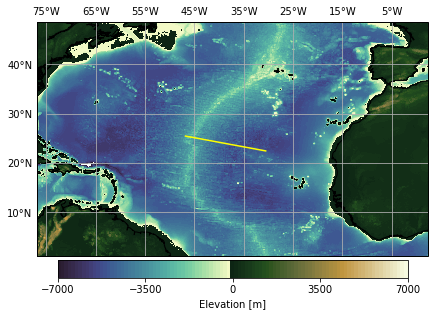

In [3]:
fig, ax = plt.subplots(1, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(7,7))

ax.set_extent([np.min(lons_etopo), np.max(lons_etopo), np.min(lats_etopo), np.max(lats_etopo)-10])
ax.coastlines(resolution='10m')

# Set colourbar limits
vmin = -7000
vmax = 7000

# Set how many contour lines to display
v = np.linspace(vmin, vmax, 100, endpoint=True)

# Set how many ticks to display in colourbar
v2 = np.linspace(vmin, vmax, 5, endpoint=True)

# Create a contour plot
contplot = ax.contourf(lons_etopo, lats_etopo, elev, v,
                       cmap=cmocean.cm.topo, vmin=vmin, vmax=vmax,
                       transform=ccrs.PlateCarree())

cbar = plt.colorbar(contplot, ax=ax, fraction=0.046, pad=0.01, ticks=v2, 
                    label='Elevation [m]', orientation="horizontal")

# Create a line that will be used to test the equation
plt.plot([-46.81, -30.55], [25.43, 22.42], color="yellow",
         transform=ccrs.PlateCarree())

# Sort out gridlines and their density
xticks_extent = list(np.arange(-75, 10, 10))
yticks_extent = list(np.arange(-10, 80, 10))

gl = ax.gridlines(linewidths=0.1)
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(xticks_extent)
gl.ylocator = mticker.FixedLocator(yticks_extent)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()

### Seafloor depth based on real age data (line test)

The bathymetry and age data were extracted for both raster files along the yellow profile seen in the previous picture and were saved as a csv file in a geospatial software. We can read the files with pandas:

In [4]:
ages = pd.read_csv("data/atlantic_seafloor_ages.csv")
ages.head()

,dist,lon,lat,age_ma
0,0.000000,-46.627525,25.303259,9.08
1,0.033913,-46.594128,25.297365,8.92
2,0.067825,-46.560731,25.291472,8.80
3,0.101738,-46.527335,25.285578,8.62
4,0.135650,-46.493938,25.279685,8.02


In [5]:
bathymetry = pd.read_csv("data/atlantic_bathymetry.csv")
bathymetry.head()

,dist,lon,lat,depth_m
0,0.000000,-46.627525,25.303259,-3759
1,0.016939,-46.610844,25.300315,-3789
2,0.033877,-46.594163,25.297371,-3750
3,0.050816,-46.577482,25.294428,-3691
4,0.067755,-46.560801,25.291484,-3599


We want to test how good the equation fits the real data. The equation predicts the seafloor depth based on age. In pandas, we can add an extra column to the file by using syntax:
    
    data["col_name"] = # value
    
We want to calculate depth of seafloor based on age according to the Parsons & Sclater (1977) relationship:

In [6]:
# Minus sign to make depth negative to match
# bathymetry dataset
ages["depth_m"] = -(2500+350*np.sqrt(ages.age_ma))

Let's plot the real data and predicted data based on the equation along the profile:

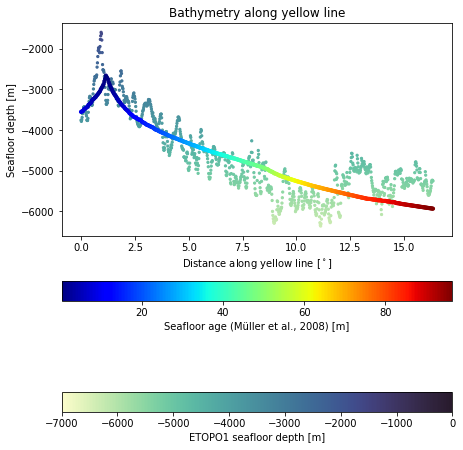

In [7]:
plt.figure(figsize=(7,8))

# Set colourbar boundaries
vmin = -7000
vmax = 0

# Create scatter plot for real bathymetry
plt.scatter(bathymetry.dist, bathymetry.depth_m, marker='o', s=5,
            c=bathymetry.depth_m, cmap=cmocean.cm.deep,
           vmin=vmin, vmax=vmax, label="_no_label_")

# Create a colourbar for real bathymetry
plt.colorbar(label="ETOPO1 seafloor depth [m]",
            orientation="horizontal")

# Create a scatter plot for calculated ages
# Ages are passed to 'c' argument to
# colour the line with age of each depth
plt.scatter(ages.dist, ages.depth_m, s=10,
           c=ages.age_ma, label="_no_label_", cmap="jet")

# Create a colourbar for seafloor age
plt.colorbar(label="Seafloor age (Müller et al., 2008) [m]",
            orientation="horizontal")

plt.xlabel("Distance along yellow line [$^\circ$]")
plt.ylabel("Seafloor depth [m]")

plt.title("Bathymetry along yellow line")
plt.show()

As we can see on the graph, curve for ages below 70 Ma fits the ETOPO1 data reasonably well, as equation predicts. However, let's quantify the root mean square error for the dataset:

$$ RMS\ Error = \sqrt{\frac{\sum_{i=1}^{n} (\text{predicted value}- \text{observed value})^2}{n}} $$,

where n is the number of samples.

Since the age and depth measurements in the two datasets are not done at exactly the same distances, we need to interpolate one dataset and compare the overlapping positions.

In [8]:
# Use scipy to interpolate real bathymetry dataset
f = interpolate.interp1d(bathymetry.dist, bathymetry.depth_m)

# Obtain real bathymetry for distances along the line
# from the age dataset
baths_interp = f(ages.dist)

Now let's define a function that will calculate RMS error based on predicted and observed samples: 

In [9]:
def rmsError(predicted, observed): 
    return np.sqrt(np.sum((predicted-observed)**2)/len(predicted))

In [10]:
# baths_interp is the real bathymetry interpolated
# at ages.dist data points
# ages.depth_m is bathymetry obtained from empirical
# data

RMS = rmsError(baths_interp, ages.depth_m)
print("RMS error in bathymetry is %.2f m." % RMS)

RMS error in bathymetry is 481.44 m.


Now that we have our RMS error, we can calculate how many samples are within one and two RMS errors. The expected values should be around 68% and 95%:

In [11]:
# compare bathymetry from the equation and real bathymetry
        
diff = abs(baths_interp - ages.depth_m)
count = (diff <= RMS).sum()

print("Number of points within 1*RMS = %.2f %s." % (count/len(baths_interp)*100, "%"))

count = (diff <= 2*RMS).sum()
        
print("Number of points within 2*RMS = %.2f %s." % (count/len(baths_interp)*100, "%"))

Number of points within 1*RMS = 63.56 %.
Number of points within 2*RMS = 97.10 %.


### Seafloor age based on real bathymetry data

To calculate seafloor age from ETOPO1 bathymetry data we will need to rearrange the original equation:

$$t = \left(\frac{d(t) - 2500}{350}\right)^2.$$

This time we will apply the equation to the entire bathymetry data from ETOPO1. We can use the _shape_ function to see how the data is structured:

In [12]:
print(elev.shape)

(3011, 4752)


The data is a 2D array with 3011 rows and 4752 columns. It is also a numpy array. We can apply the equation on the whole array to create a new array. However, we should only use the parts where elevation is below 0 m. In order to do that, we need to mask _elev_ array:

In [13]:
# Mask elev array where anything above zero
# is set to NaN which is not displayed in graphs
elev_seafloor = np.where(elev < 0, elev, np.nan)

Now we can calculate ages of the seafloor from ETOPO1 bathymetry. Note that elevation on seafloor is negative in our dataset, while in the equation it is positive, so we can change the sign:

In [14]:
ages_seafloor = ((-elev_seafloor-2500.)/350.)**2

Since the original dataset is large, we can provide the code and the end result for side by side comparison of the ages calculated based on bathymetry and real age based on magnetic anomalies:

In [ ]:
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(7,10))

# Create subplot for real age data
ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())

extent = [np.min(lons_etopo), np.max(lons_etopo), np.min(lats_etopo), np.max(lats_etopo)-10]

ax1.set_title("Seafloor age from magnetic anomalies")
ax1.set_extent(extent)
ax1.coastlines('110m', lw=1)

vmin = 0
vmax = 200

# Set how many contour lines to display
v = np.linspace(vmin, vmax, 11, endpoint=True)

# Set how many ticks to display in colourbar
v2 = np.linspace(vmin, vmax, 11, endpoint=True)

# Create contour plot
contplot = ax1.contourf(lons_age, lats_age, age, v,
                       cmap="gist_rainbow",
                       transform=ccrs.PlateCarree())
# Create colourbar
cbar = plt.colorbar(contplot, ax=ax1, fraction=0.046, pad=0.01, 
                    label='Age [Ma]', ticks = v2)

# Sort out gridlines and their density
xticks_extent = list(np.arange(-75, 10, 10))
yticks_extent = list(np.arange(-10, 80, 10))

gl = ax1.gridlines(linewidths=0.1)
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(xticks_extent)
gl.ylocator = mticker.FixedLocator(yticks_extent)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


# Create subplot for predicted age based on elevation
ax2 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())

ax2.set_title("Predicted seafloor age from ETOPO1 bathymetry")
ax2.set_extent(extent)
ax2.coastlines('110m', lw=1)


# Create contour plot
contplot = ax2.contourf(lons_etopo, lats_etopo, ages_seafloor, v,
                       cmap="gist_rainbow",
                       transform=ccrs.PlateCarree())
# Create colourbar
cbar = plt.colorbar(contplot, ax=ax2, fraction=0.046, pad=0.01, 
                    label='Predicted seafloor age [Ma]', ticks = v2)

# Sort out gridlines and their density
xticks_extent = list(np.arange(-75, 10, 10))
yticks_extent = list(np.arange(-10, 80, 10))

gl = ax2.gridlines(linewidths=0.1)
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(xticks_extent)
gl.ylocator = mticker.FixedLocator(yticks_extent)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.subplots_adjust(wspace=0.1)
plt.show()

Comparing real seafloor age and age calculated based on depth, we can see that the relationship does not work for ages above 70 Ma. In the real age dataset, we can see that seafloor near continental margins is > 140 Ma old, while according to the equation from Parsons & Sclatter (1977), the seafloor there should be very young.

```{figure} ../images/seafloor_ages_north_atlantic_comparison.png
:width: 600px
```

## References
* Material used in this notebook was based on plate tectonics lecture content of Dynamic Earth module at Earth Science and Engineering Department